**Housing Price Prediction: Random Forest Regression**

This project involves developing and evaluating a machine learning model using the Random Forest Regressor algorithm to predict housing prices in California. The dataset is based on the California Housing dataset, which contains demographic and housing features from various regions in California. These features include the geographic location of each house (latitude, longitude), the average age of the houses, total rooms, total bedrooms, household size, income level, and other factors.

The target variable is the median house value, which represents the average price of the houses. Predicting this target variable has important applications, particularly in the real estate industry and economic analysis.

In this project, the Random Forest Regressor, a machine learning algorithm that combines multiple decision trees to make powerful predictions, is used to predict housing prices. Random Forest is an ensemble method that typically provides high accuracy rates.

In [6]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
data=fetch_california_housing()

X = pd.DataFrame(data.data, columns=data.feature_names)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [9]:
X.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [12]:
y = pd.Series(data.target, name="median_house_value")
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: median_house_value, Length: 20640, dtype: float64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("\nMean Absolute Error:", mae)
print("\nMean Squared Error:", mse)
print("\nR2 Score:",r2)


Model Performance:

Mean Absolute Error: 0.3287298056201552

Mean Squared Error: 0.2555374740504419

R2 Score: 0.8049941061961611


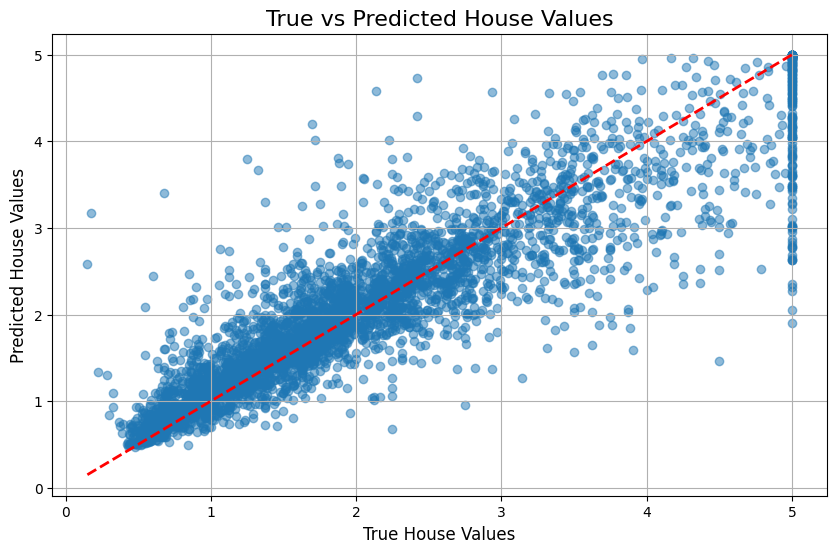

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# 1. Gerçek vs Tahmin Değerleri: Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("True vs Predicted House Values", fontsize=16)
plt.xlabel("True House Values", fontsize=12)
plt.ylabel("Predicted House Values", fontsize=12)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", lw=2)  # Y=x çizgisi
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


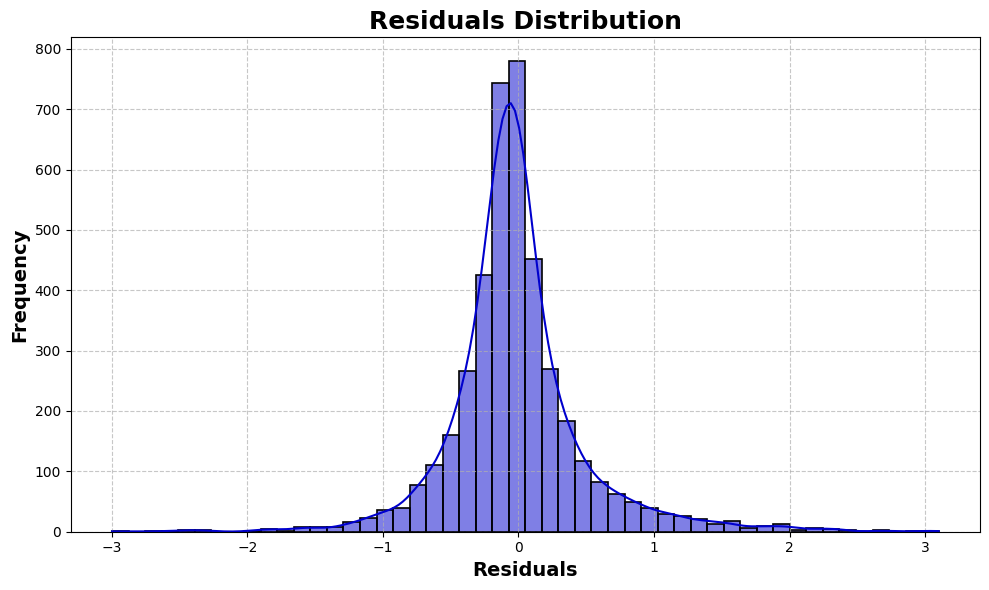

In [22]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True, color='mediumblue', edgecolor='black', linewidth=1.2)
plt.title("Residuals Distribution", fontsize=18, fontweight='bold')
plt.xlabel("Residuals", fontsize=14, fontweight='bold')
plt.ylabel("Frequency", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

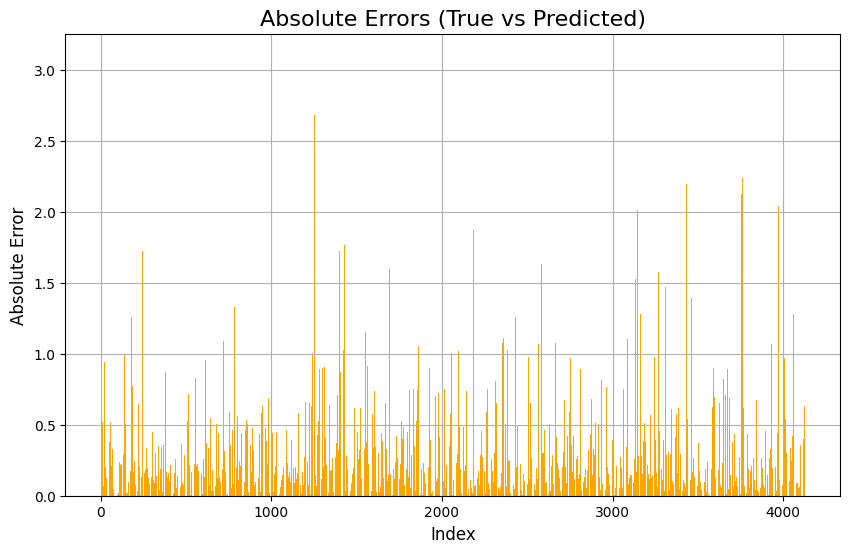

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(y_test)), np.abs(y_test - y_pred), color='orange')
plt.title("Absolute Errors (True vs Predicted)", fontsize=16)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Absolute Error", fontsize=12)
plt.grid(True)
plt.show()